In [15]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [17]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [18]:
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
887,ham,Y dun cut too short leh. U dun like ah? She fa...,NaN,NaN,NaN
2554,ham,I'll reach in ard 20 mins ok...,NaN,NaN,NaN


In [19]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [20]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [23]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
#Reanaming Colum
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [25]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
df['Target'] = encoder.fit_transform(df['Target'])

In [28]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [30]:
df.duplicated().sum()

403

In [31]:
df=df.drop_duplicates(keep='first')

In [32]:
df.head(2)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


# 2. EDA (Expoletory Data analysis)

In [33]:
df.Target.value_counts()

0    4516
1     653
Name: Target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

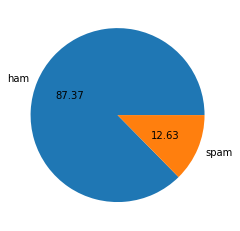

In [34]:
import matplotlib.pyplot as plt
plt.pie(df.Target.value_counts(), labels= ['ham', 'spam'], autopct='%0.2F')
plt.show

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['Num_char']=df['Text'].apply(len)

C:\Users\banso\AppData\Local\Temp\ipykernel_9560\1594860956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_char']=df['Text'].apply(len)


In [37]:
df.head(2)

,Target,Text,Num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [38]:
#Number of words
df['Num_Words']=df.Text.apply(lambda X:len(nltk.word_tokenize(X)))

C:\Users\banso\AppData\Local\Temp\ipykernel_9560\4190425291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Words']=df.Text.apply(lambda X:len(nltk.word_tokenize(X)))


In [39]:
df.head(2)

,Target,Text,Num_char,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [40]:
df['Num_Sent']=df.Text.apply(lambda X:len(nltk.sent_tokenize(X)))

C:\Users\banso\AppData\Local\Temp\ipykernel_9560\2557521624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Sent']=df.Text.apply(lambda X:len(nltk.sent_tokenize(X)))


In [41]:
df.head(2)

,Target,Text,Num_char,Num_Words,Num_Sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [42]:
df

,Target,Text,Num_char,Num_Words,Num_Sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [43]:
df[['Num_char','Num_Words','Num_Sent']].describe()

,Num_char,Num_Words,Num_Sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [44]:
df[df['Target']==0][['Num_char','Num_Words','Num_Sent']].describe()

,Num_char,Num_Words,Num_Sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
df[df['Target']==1][['Num_char','Num_Words','Num_Sent']].describe()

,Num_char,Num_Words,Num_Sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [46]:
import seaborn as sns

<AxesSubplot:xlabel='Num_char', ylabel='Count'>

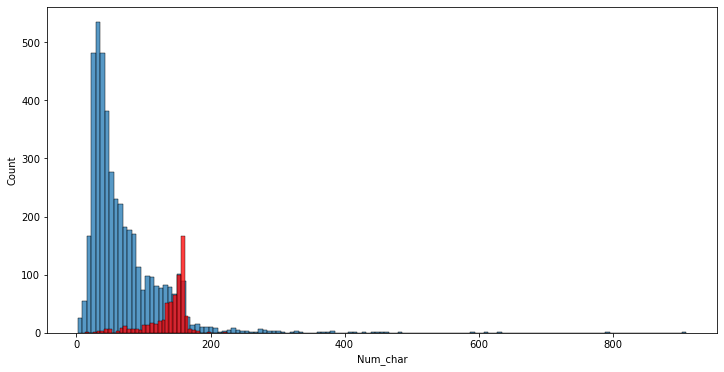

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.Target==0]['Num_char'])
sns.histplot(df[df.Target==1]['Num_char'],color='red')

<AxesSubplot:xlabel='Num_Words', ylabel='Count'>

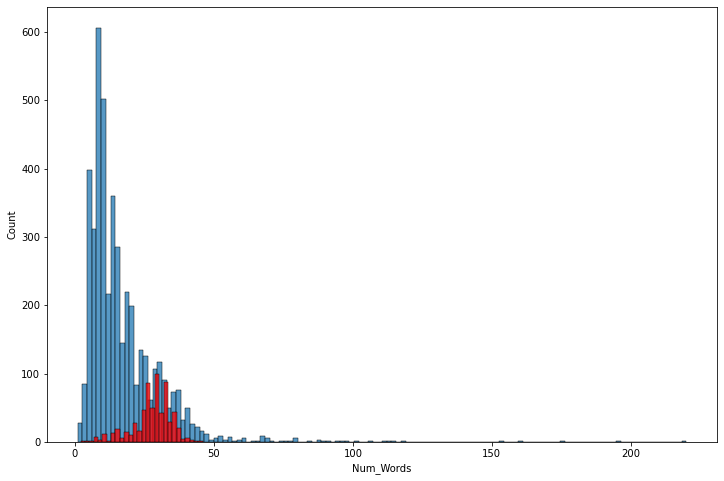

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(df[df.Target==0]['Num_Words'])
sns.histplot(df[df.Target==1]['Num_Words'],color='red')

<AxesSubplot:xlabel='Num_Sent', ylabel='Count'>

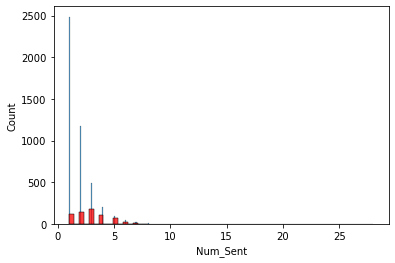

In [49]:
sns.histplot(df[df.Target==0]['Num_Sent'])
sns.histplot(df[df.Target==1]['Num_Sent'],color='red')

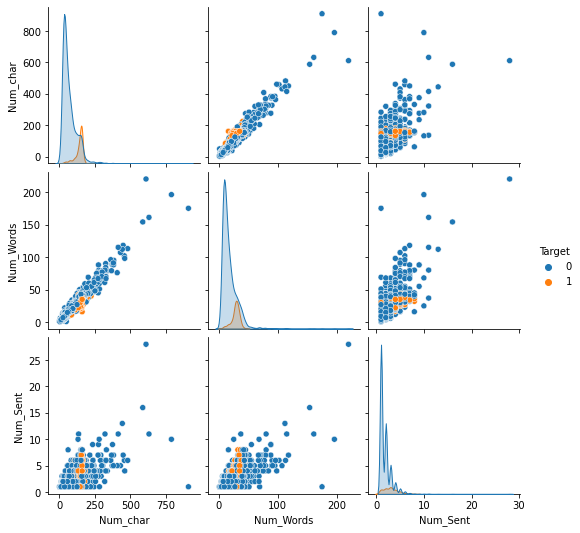

In [50]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

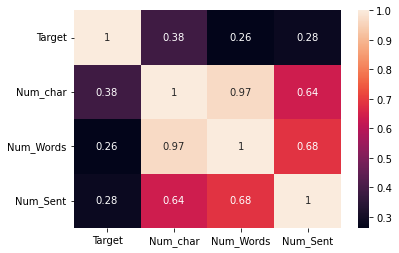

In [51]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

Lower Case,
Tokenization,
Removing special charector,
Remove stop word,
Steaming.

In [52]:

from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem import PorterStemmer
porter = PorterStemmer()
ps = PorterStemmer()


def Transform_Text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [53]:
Transform_Text('I am the don and killer  you TITATA.')

'killer titata'

In [54]:
df.head()

,Target,Text,Num_char,Num_Words,Num_Sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df["Transformed_Text"]=df["Text"].apply(Transform_Text)

C:\Users\banso\AppData\Local\Temp\ipykernel_9560\3491273606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Transformed_Text"]=df["Text"].apply(Transform_Text)


In [56]:
df.head()

,Target,Text,Num_char,Num_Words,Num_Sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
import sys
print(sys.executable)

C:\Users\banso\anaconda3\python.exe


In [58]:
import matplotlib.pyplot as plt

In [59]:
from wordcloud import WordCloud
wc = WordCloud(width=2000, height= 2000, min_font_size=10, background_color= 'white')

In [60]:
Spam_WC=wc.generate(df[df['Target']== 1]['Transformed_Text'].str.cat(sep=" "))

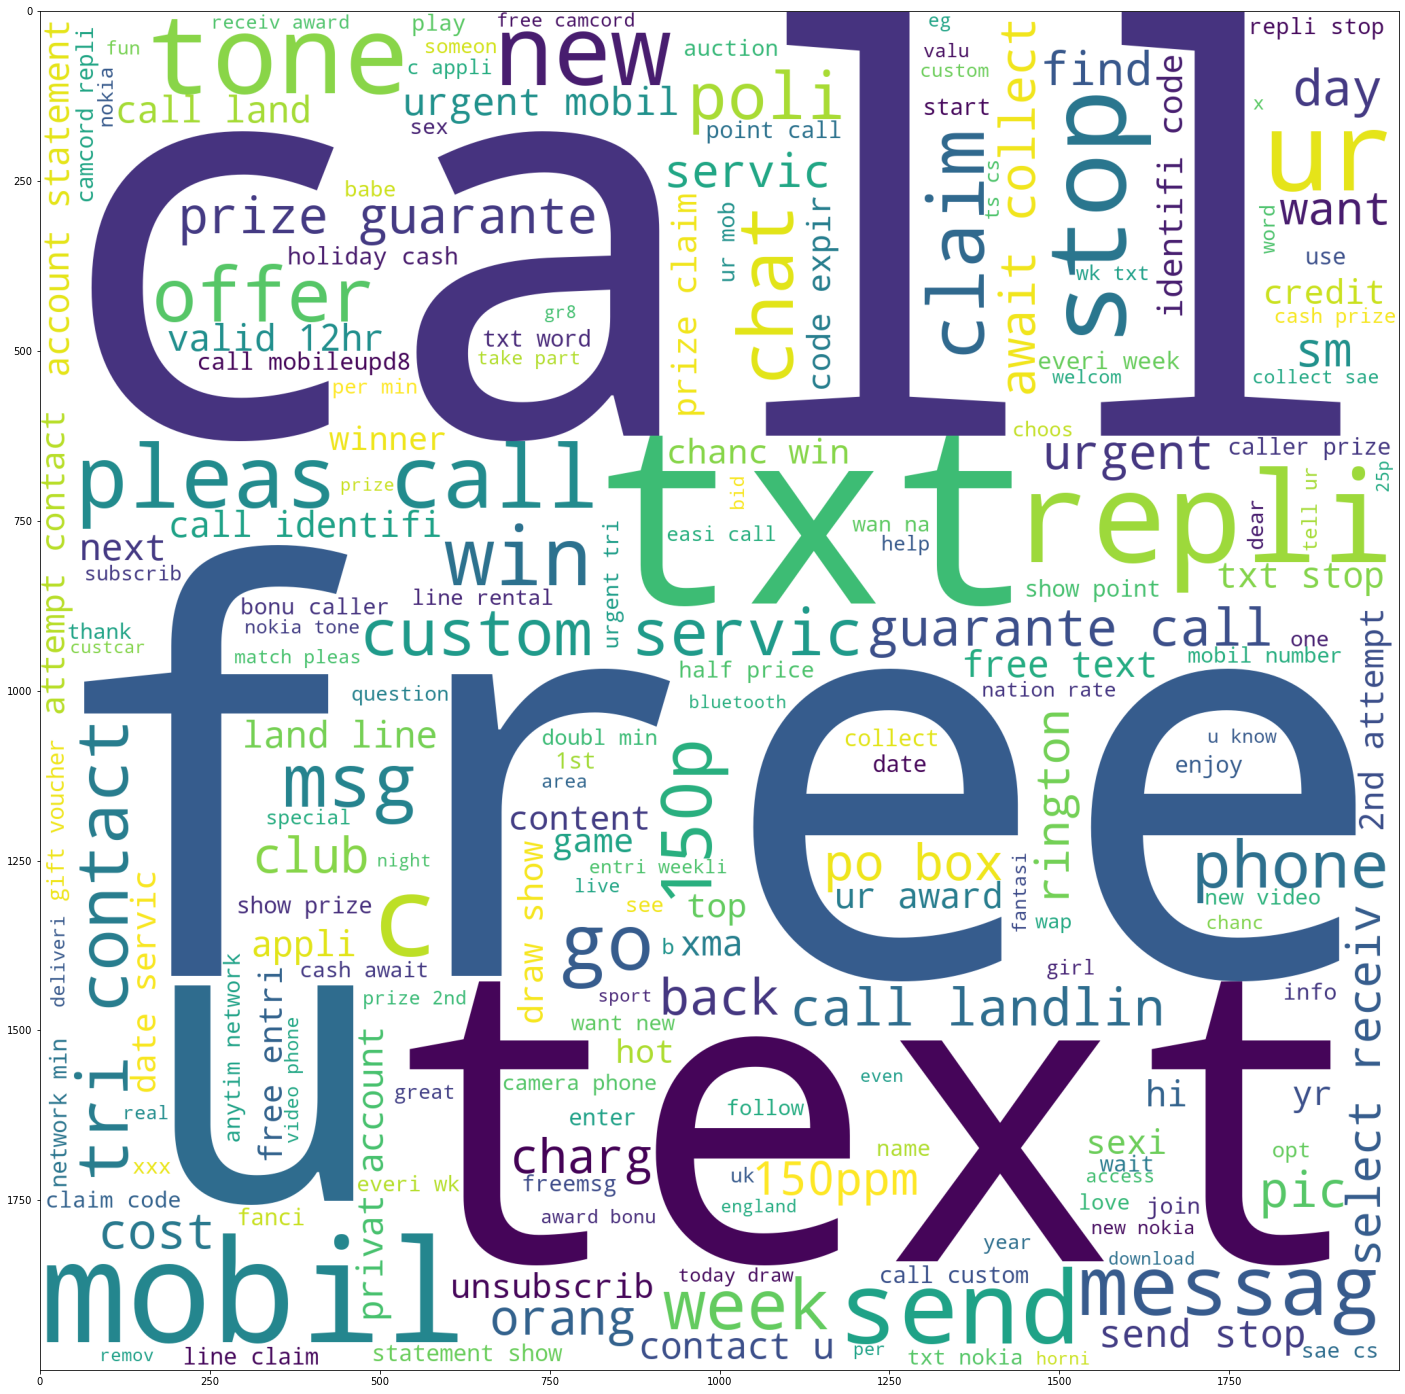

In [61]:
plt.figure(figsize=(50,25))
plt.imshow(Spam_WC)

In [62]:
Ham_WC=wc.generate(df[df['Target']== 0]['Transformed_Text'].str.cat(sep=" "))

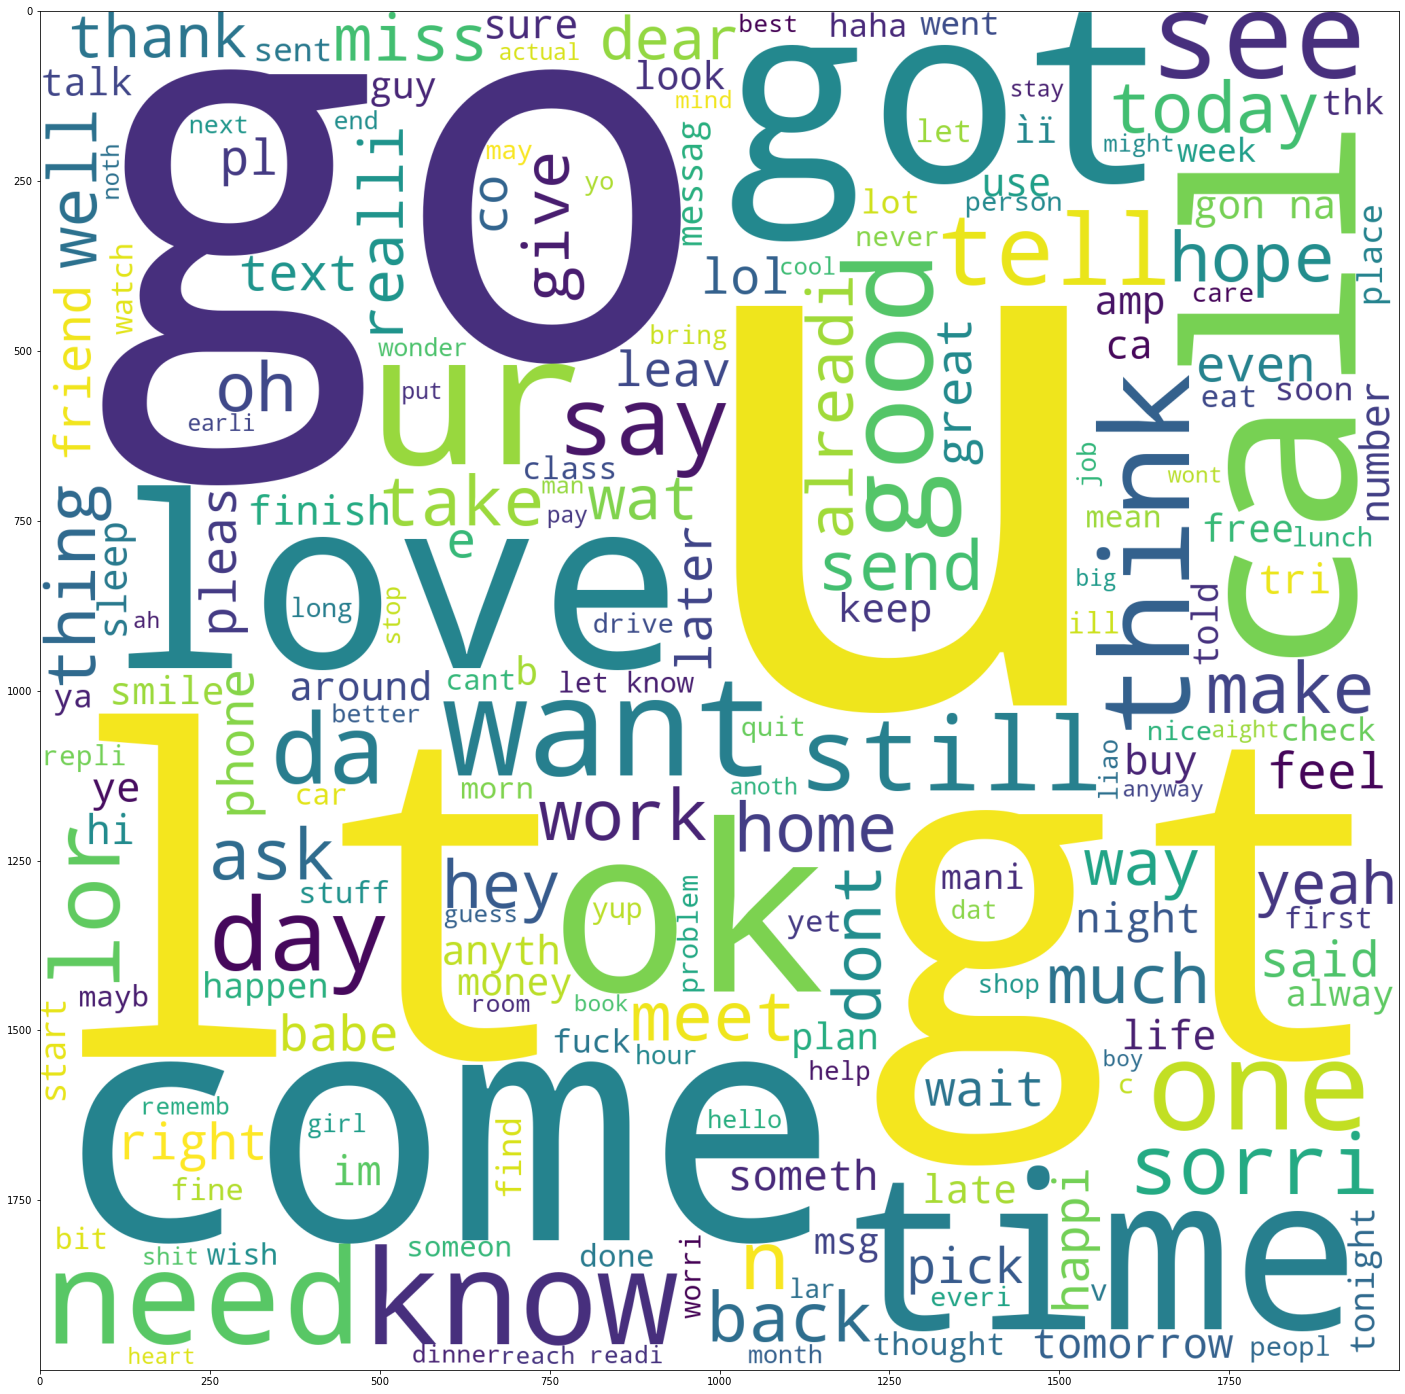

In [63]:
plt.figure(figsize=(50,25))
plt.imshow(Ham_WC)

In [64]:
df.head(2)

,Target,Text,Num_char,Num_Words,Num_Sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [65]:
df[df.Target==1]['Transformed_Text'].tolist()


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

Model_Building

In [66]:
df.head()

,Target,Text,Num_char,Num_Words,Num_Sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer()

In [68]:
X=cv.fit_transform(df['Transformed_Text']).toarray()

In [69]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
Y= df['Target'].values

In [71]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size= 0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [75]:
gnb = GaussianNB()
mnb = GaussianNB()
bnb = BernoulliNB()

In [76]:
gnb.fit (X_train, Y_train)
Ypred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Ypred1))
print(confusion_matrix(Y_test, Ypred1))
print(precision_score(Y_test, Ypred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [77]:
mnb.fit (X_train, Y_train)
Ypred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Ypred2))
print(confusion_matrix(Y_test, Ypred2))
print(precision_score(Y_test, Ypred2))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [78]:
bnb.fit (X_train, Y_train)
Ypred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Ypred3))
print(confusion_matrix(Y_test, Ypred3))
print(precision_score(Y_test, Ypred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
